In [45]:
import numpy as np
import matplotlib.pyplot as plt

import illustris_python as il

In [3]:
cd /Users/festabu/TNG100-1/output/groups_099/

/Users/festabu/TNG100-1/output/groups_099


In [4]:
pwd

'/Users/festabu/TNG100-1/output/groups_099'

In [5]:
basePath = '/Users/festabu/TNG100-1/output'

In [6]:
fields2 = ['SubhaloHalfmassRadType','SubhaloMassInRadType', 'SubhaloSFRinRad', 'SubhaloFlag']

# 'SubhaloHalfmassRadType' = Comoving radius containing half of the mass of this Subhalo split by Type (SubhaloMassType).
# 'SubhaloMassInRadType' = Sum of masses of all particles/cells (split by type) within twice the stellar half mass radius.
# 'SubhaloSFRinRad' = Same as SubhaloSFR, but restricted to cells within twice the stellar half mass radius.
# 'SubhaloFlag' = Flag field indicating suitability of this subhalo for certain types of analysis. If zero, this subhalo should generally be excluded, and is not thought to be of cosmological origin. That is, it may have formed within an existing halo, or is possibly a baryonic fragment of a disk or other galactic structure identified by Subfind. If one, this subhalo should be considered a 'galaxy' or 'satellite' of cosmological origin. (Note: always true for centrals). See the data release background for details.

In [7]:
def load_galaxies (basePath, snapshot, fields):
    '''Loads subhalos and defines galaxy mass and galaxy size'''
    
    subhalos = il.groupcat.loadSubhalos(basePath,snapshot,fields=fields)
    
    # define galaxy size
    galaxy_size=subhalos['SubhaloHalfmassRadType'][:,4]
    galaxy_size=galaxy_size/0.7 # divide by h=0.7
    
    # define galaxy mass as only the stellar component
    galaxy_mass=subhalos['SubhaloMassInRadType'][:,4]
    galaxy_mass=(galaxy_mass/0.7)*1e10 # multiply galaxy mass by 1e10 and divide by h=0.7
    
    return subhalos, galaxy_mass, galaxy_size

In [8]:
def function(galaxy_mass, galaxy_size, subhalos, type_of_galaxy):
    '''
    Converts to log10 non-zero size and mass entries for central and satellite galaxies
    
    output: log mass, log size
    
    '''
    subhalo_flag = subhalos['SubhaloFlag']
    
    if type_of_galaxy == 'central':
        galaxy_mass = galaxy_mass[subhalo_flag]
        galaxy_size = galaxy_size[subhalo_flag]
    
    elif type_of_galaxy == 'satellite':
        galaxy_mass = galaxy_mass[~subhalo_flag]
        galaxy_size = galaxy_size[~subhalo_flag]
        
    else: pass
        
    with np.errstate(divide='ignore'):
        galaxy_mass_log = np.where(galaxy_mass>0, np.log10(galaxy_mass), 0)
        galaxy_size_log = np.where(galaxy_size>0, np.log10(galaxy_size), 0)

    mask_non_zero = galaxy_mass_log>0
    galaxy_mass_log = galaxy_mass_log[mask_non_zero]
    galaxy_size_log = galaxy_size_log[mask_non_zero]

        
    return galaxy_mass_log, galaxy_size_log


In [9]:
galaxies=load_galaxies(basePath, 99, fields2)

In [10]:
galaxies[0]

{'count': 4371211,
 'SubhaloHalfmassRadType': array([[627.3106   , 610.31036  ,   0.       ,   0.       ,  47.388058 ,
           0.       ],
        [368.52603  , 291.9038   ,   0.       ,   0.       ,  17.01238  ,
           0.       ],
        [ 49.645374 ,  82.63892  ,   0.       ,   0.       ,  14.983969 ,
           0.       ],
        ...,
        [  0.       ,   2.2495959,   0.       ,   0.       ,   0.       ,
           0.       ],
        [  0.       ,   3.8835316,   0.       ,   0.       ,   0.       ,
           0.       ],
        [  0.       ,   6.6095586,   0.       ,   0.       ,   0.       ,
           0.       ]], dtype=float32),
 'SubhaloMassInRadType': array([[8.01218872e+01, 1.30521240e+03, 0.00000000e+00, 0.00000000e+00,
         1.63834213e+02, 6.98100448e-01],
        [1.07298613e+00, 1.21830765e+02, 0.00000000e+00, 0.00000000e+00,
         2.57310143e+01, 1.25566334e-01],
        [2.82840753e+00, 1.08587250e+02, 0.00000000e+00, 0.00000000e+00,
         2.88526

In [11]:
# define galaxy mass and size
galaxy_mass=galaxies[1]
galaxy_size=galaxies[2]
subhalos=galaxies[0]

In [12]:
galaxy_mass.shape

(4371211,)

In [13]:
galaxy_size.shape

(4371211,)

### Central galaxies vs satellites

In [14]:
# define central and satellite galaxies
central_galaxies = function(galaxy_mass, galaxy_size, subhalos, type_of_galaxy = 'central')

In [15]:
central_galaxies

(array([12.369307 , 11.565359 , 11.615088 , ...,  6.136387 ,  6.2803073,
         6.3790245], dtype=float32),
 array([1.8305709, 1.3856671, 1.3305289, ..., 0.5451923, 0.888738 ,
        0.828501 ], dtype=float32))

In [16]:
central_galaxies_mass=central_galaxies[0]

In [17]:
central_galaxies_size=central_galaxies[1]

In [18]:
satellite_galaxies = function(galaxy_mass, galaxy_size, subhalos, type_of_galaxy = 'satellite')

In [19]:
satellite_galaxies

(array([10.444906 , 10.357529 , 10.022986 , ...,  7.4736967,  7.129745 ,
         7.3045626], dtype=float32),
 array([-0.32875994, -0.21534945, -0.47593984, ...,  0.30024627,
         0.09706522,  0.5617837 ], dtype=float32))

In [20]:
satellite_galaxies_mass=satellite_galaxies[0]

In [21]:
satellite_galaxies_size=satellite_galaxies[1]

In [22]:
central_galaxies_mass.shape

(203524,)

In [23]:
satellite_galaxies_mass.shape

(9405,)

In [34]:
203524+9405

212929

### Mass vs SFR Plot - Example from tng-project.org

In [24]:
# fields = ['SubhaloMass','SubhaloSFRinRad']
# subhalos = il.groupcat.loadSubhalos(basePath,99,fields=fields)
# mass_msun = subhalos['SubhaloMass'] * 1e10 / 0.704
# plt.plot(mass_msun,subhalos['SubhaloSFRinRad'],'.')
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('Total Mass [$M_\odot$]')
# plt.ylabel('Star Formation Rate [$M_\odot / yr$]')

### Scatter plot

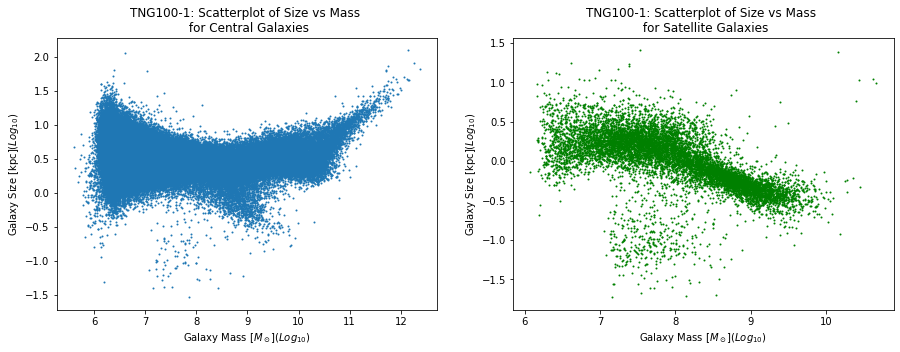

In [44]:
# plt.plot(galaxy_mass,galaxy_size, '.', markersize=2)
# plt.xscale('log')
# plt.yscale('log')
# plt.ylabel('Galaxy Size [kpc]')
# plt.xlabel('Galaxy Mass [$ M_\odot $]')
# #plt.savefig("Mass_vs_Size_updated_v2.jpeg", dpi=500)
# plt.show()

fig3,[ax1, ax2]=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

ax1.plot(central_galaxies_mass, central_galaxies_size, '.', markersize=2)
ax1.set_title('TNG100-1: Scatterplot of Size vs Mass \n for Central Galaxies')
ax1.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
ax1.set_ylabel('Galaxy Size [kpc]($ Log_{10} $)')

ax2.plot(satellite_galaxies_mass, satellite_galaxies_size, '.', markersize=2, color='g')
ax2.set_title('TNG100-1: Scatterplot of Size vs Mass \n for Satellite Galaxies')
ax2.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
ax2.set_ylabel('Galaxy Size [kpc]($ Log_{10} $)')

#plt.savefig("TNG1001_central_satellite_scatterplot.jpeg", dpi=500)
plt.show()

### 2D Histogram 

##### 2d Histogram function vs Matplotlib hist2d

In [26]:
def hist2dplot(axis,x,y,fill=True,**kwargs):
    
    h,xed,yed=np.histogram2d(x,y)
    
    
    h=np.transpose(h)
    total=h.sum()
    h=h/total
    hflat=np.sort(np.reshape(h,-1)) #makes 1D and sorted 
    csum=np.cumsum(hflat)
    values=1.0-np.array([0.9973,0.9545,0.6827,0.0])
    
    levels=[]
    
    for val in values:
        idx = (np.abs(csum - val)).argmin()
        levels.append(hflat[idx])

    if fill:
        colors=['#f7f7f7','#cccccc','#969696','#525252'] #gray
#        colors=['#ffffcc','#c2e699','#78c679','#238443'] #green 
        axis.contourf(h,levels,colors=colors,extent=[xed[0],xed[-1],yed[0],yed[-1]])
    else:
        colors=['#fdcc8a','#fc8d59','#d7301f']
        axis.contour(h,levels,colors=colors,extent=[xed[0],xed[-1],yed[0],yed[-1]])
    
    

Text(0.5, 0, 'Galaxy Mass [$ M_\\odot $]($ Log_{10} $)')

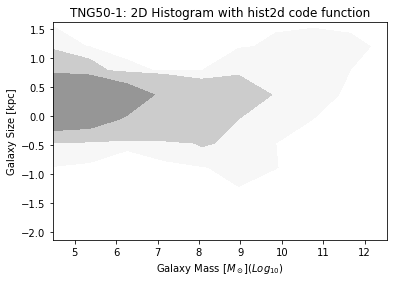

In [40]:
# Figure using the 2D Histogram function

fig2, ax =plt.subplots()
#axis=fig2.add_subplot()
hist2dplot(ax, galaxy_mass, galaxy_size, fill=True, bins=1000)
plt.title('TNG50-1: 2D Histogram with hist2d code function')
plt.ylabel('Galaxy Size [kpc]')
plt.xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
#plt.savefig("TNG501_GalaxyStellarMass_vs_Size_hist2Dplot_v1.jpeg", dpi=500)

In [41]:
ax

<AxesSubplot:title={'center':'TNG50-1: 2D Histogram with hist2d code function'}, xlabel='Galaxy Mass [$ M_\\odot $]($ Log_{10} $)', ylabel='Galaxy Size [kpc]'>

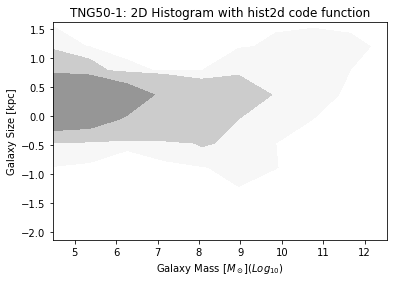

In [53]:
# Figure using the 2D Histogram function where histogram range is defined

fig2, ax =plt.subplots()
#axis=fig2.add_subplot()
hist2dplot(ax, galaxy_mass_log, galaxy_size_log, fill=True, bins=10, range=[[8,11],[0.4,1.4]])
plt.title('TNG50-1: 2D Histogram with hist2d code function')
plt.ylabel('Galaxy Size [kpc]')
plt.xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
#plt.savefig("TNG501_GalaxyStellarMass_vs_Size_hist2Dplot_v2.jpeg", dpi=500)

#### Plot the 1D histograms

#### Mass and Size

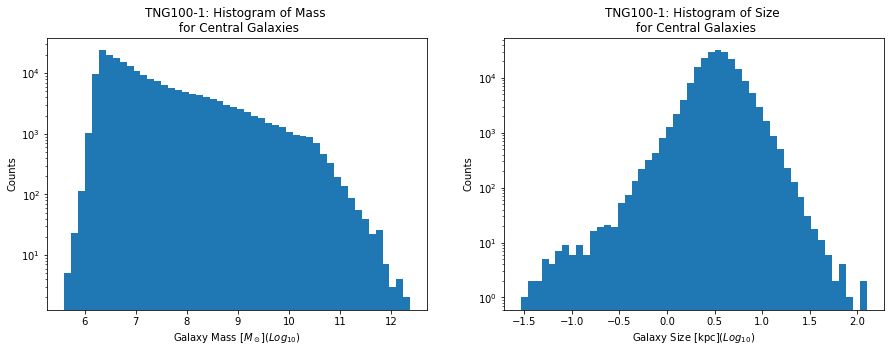

In [52]:
fig,[ax1, ax2]=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

ax1.hist(central_galaxies_mass,bins=50, log=True) # divide by the volume of the simulation box
ax1.set_title('TNG100-1: Histogram of Mass \n for Central Galaxies')
ax1.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
ax1.set_ylabel('Counts')

ax2.hist(central_galaxies_size,bins=50, log=True)
ax2.set_title('TNG100-1: Histogram of Size \n for Central Galaxies')
ax2.set_xlabel('Galaxy Size [kpc]($ Log_{10} $)')
ax2.set_ylabel('Counts')

#plt.savefig("TNG1001_central_Hist1D.jpeg", dpi=500)
plt.show()

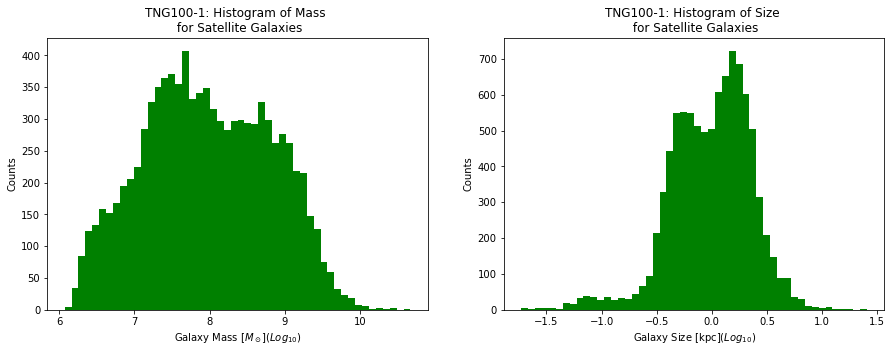

In [41]:
fig2,[ax1, ax2]=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

ax1.hist(satellite_galaxies_mass, facecolor='g', bins=50)
ax1.set_title('TNG100-1: Histogram of Mass \n for Satellite Galaxies')
ax1.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
ax1.set_ylabel('Counts')

ax2.hist(satellite_galaxies_size, facecolor='g', bins=50)
ax2.set_title('TNG100-1: Histogram of Size \n for Satellite Galaxies')
ax2.set_xlabel('Galaxy Size [kpc]($ Log_{10} $)')
ax2.set_ylabel('Counts')

#plt.savefig("TNG1001_satellite_Hist1D.jpeg", dpi=500)
plt.show()


#### Mass and Size Density (divide by the volume of the simulation)

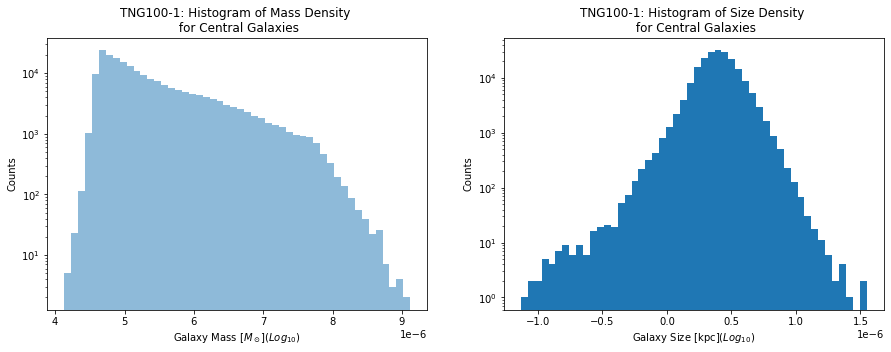

In [49]:
fig3,[ax1, ax2]=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

ax1.hist(central_galaxies_mass/((110.7)**3),bins=50, log=True, alpha=0.5) # divide by the volume of the simulation box
ax1.set_title('TNG100-1: Histogram of Mass Density \n for Central Galaxies')
ax1.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
ax1.set_ylabel('Counts')

ax2.hist(central_galaxies_size/((110.7)**3),bins=50, log=True)
ax2.set_title('TNG100-1: Histogram of Size Density \n for Central Galaxies')
ax2.set_xlabel('Galaxy Size [kpc]($ Log_{10} $)')
ax2.set_ylabel('Counts')

#plt.savefig("TNG1001_central_Hist1D.jpeg", dpi=500)
plt.show()

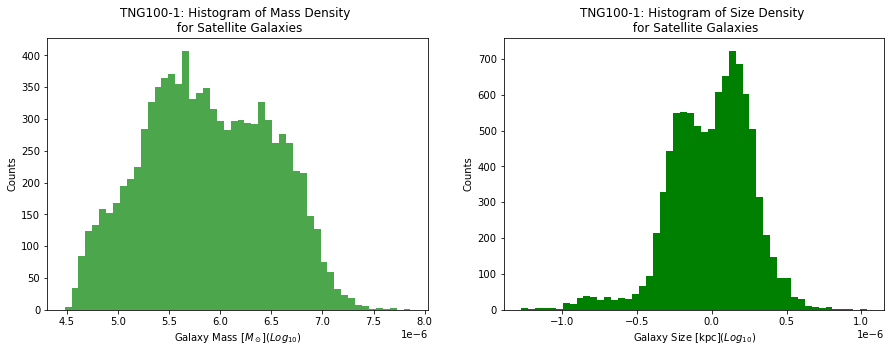

In [51]:
fig4,[ax1, ax2]=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

ax1.hist(satellite_galaxies_mass/((110.7)**3), facecolor='g', bins=50, alpha=0.7)
ax1.set_title('TNG100-1: Histogram of Mass Density \n for Satellite Galaxies')
ax1.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
ax1.set_ylabel('Counts')

ax2.hist(satellite_galaxies_size/((110.7)**3), facecolor='g', bins=50)
ax2.set_title('TNG100-1: Histogram of Size Density \n for Satellite Galaxies')
ax2.set_xlabel('Galaxy Size [kpc]($ Log_{10} $)')
ax2.set_ylabel('Counts')

#plt.savefig("TNG1001_satellite_Hist1D.jpeg", dpi=500)
plt.show()



### Plot the 2D histograms

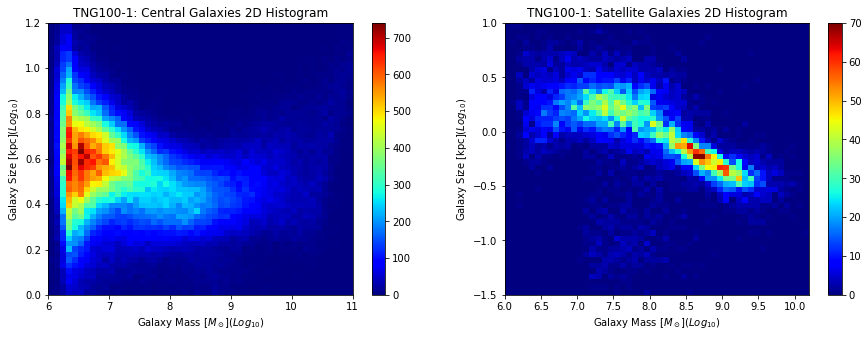

In [42]:
# Figure using the Matplotlib hist2d
import matplotlib.cm as cm
import matplotlib.colors as norm

fig4,[ax1, ax2]=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

im1 = ax1.hist2d(central_galaxies_mass, central_galaxies_size, cmap = plt.cm.jet, bins=50, range=[[6,11],[0.0,1.2]])
ax1.set_title('TNG100-1: Central Galaxies 2D Histogram')
ax1.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
ax1.set_ylabel('Galaxy Size [kpc]($ Log_{10} $)')
fig4.colorbar(im1[3], ax=ax1)



im2 = ax2.hist2d(satellite_galaxies_mass, satellite_galaxies_size, cmap = plt.cm.jet, bins=50, range=[[6,10.2],[-1.5,1.0]])
ax2.set_title('TNG100-1: Satellite Galaxies 2D Histogram')
ax2.set_xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
ax2.set_ylabel('Galaxy Size [kpc]($ Log_{10} $)')
fig4.colorbar(im2[3], ax=ax2)



#plt.savefig("TNG1001_central_satellite_Hist2D.jpeg", dpi=500)
plt.show()


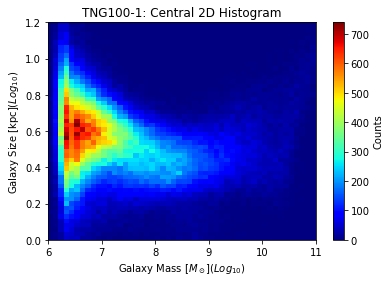

In [35]:
# Figure using the Matplotlib hist2d where histogram range is defined

plt.hist2d(central_galaxies_mass, central_galaxies_size, cmap = plt.cm.jet, bins=50, range=[[6,11],[0.0,1.2]]  )
plt.title('TNG100-1: Central 2D Histogram')
plt.ylabel('Galaxy Size [kpc]($ Log_{10} $)')
plt.xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
cbar2 = plt.colorbar()
cbar2.ax.set_ylabel('Counts')
#plt.savefig("TNG501_GalaxyStellarMass_vs_Size_Hist2D_v2.jpeg", dpi=500)
plt.show()

### Histogram 2D and Scatter Plot overlap

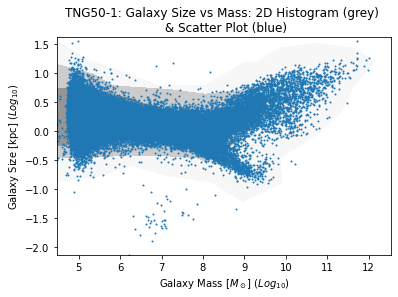

In [51]:
fig2, ax =plt.subplots()
#axis=fig2.add_subplot()
hist2dplot(ax, galaxy_mass_log, galaxy_size_log, fill=True)
plt.title('TNG50-1: Galaxy Size vs Mass: 2D Histogram (grey) \n & Scatter Plot (blue)')
plt.plot(galaxy_mass_log,galaxy_size_log, '.', markersize=2)
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Galaxy Size [kpc] ($ Log_{10} $)')
plt.xlabel('Galaxy Mass [$ M_\odot $] ($ Log_{10} $)')
#plt.savefig("TNG501_GalaxyStellarMass_vs_Size_hist2d_and_scatterplot.jpeg", dpi=500)
plt.show()

In [52]:
il.groupcat.loadSubhalos(basePath, 99).keys()

dict_keys(['count', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloFlag', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloIDMostbound', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetalFractions', 'SubhaloStarMetalFractionsHalfRad', 'SubhaloStarMetalFractionsMaxRad', 'SubhaloStarMetallicity', 'SubhaloStarMe